# Project Title : Yearly UCSD Application Rate and League Table Linear Regression Model
Authors: 
Thanh Luong
Abigail Han
Saroop Samra
Amy Nguyen

# Question
Is there a valid SIMPLE linear regression with US News Rankings and Yearly UCSD Application Rate?
What does a visualization of this look like?
What is the pearson correlation factor?


Is there a valid MULTIPLE linear regression with US News Rankings and Times Score and Yearly UCSD Application Rate?
What does a visualization of this look like?
What is the pearson correlation factor?

# Data

Include the code to read your dataset in below and briefly explain what information is included in your dataset that you'll use for analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

my_data = np.loadtxt('ec_data.txt',delimiter=',',dtype=float)
np.set_printoptions(suppress=True)
print(my_data)

[[ 1996.      43.       0.   23687.       0.  ]
 [ 1997.      34.       0.   25098.       5.96]
 [ 1998.      33.       0.   28090.      11.92]
 [ 1999.      32.       0.   32541.      15.85]
 [ 2000.      32.       0.   35693.       9.69]
 [ 2001.      31.       0.   38188.       6.99]
 [ 2002.      31.       0.   41346.       8.27]
 [ 2003.      31.       0.   43443.       5.07]
 [ 2004.      32.       0.   41524.      -4.42]
 [ 2005.      35.       0.   40534.      -2.38]
 [ 2006.      32.       0.   43591.       7.54]
 [ 2007.      38.       0.   45088.       3.43]
 [ 2008.      38.       0.   47385.       5.09]
 [ 2009.      35.       0.   47060.      -0.69]
 [ 2010.      35.       0.   48098.       2.21]
 [ 2011.      35.      73.2  53449.      11.13]
 [ 2012.      37.      73.   60832.      13.81]
 [ 2013.      38.      75.2  67391.      10.78]
 [ 2014.      39.      67.4  73448.       8.99]
 [ 2015.      37.      68.6  78061.       6.28]
 [ 2016.      39.      72.2  84206.     

# Data Wrangling

Include text and code needed to wrangle your data into a tidy data format. If your data are already in a usable format, explain what checks you did on the data (and include the code) to ensure that the data were tidy:

Prepare data for simple linear regression : Year, US New Score, Yearly Applicant Rate
  We will drop the Number of Applicants, Times Score columns 
  
Prepare data for multiple linear regression : Year, US New Score, Times Score, Yearly Applicant Rate
  We will drop the Number of Applicants
  We will drop all Rows where the Times Score is zero (data was unavailable)
  

In [2]:
# Simple Linear Regression Data: Drop the Year, Number of Applicants, Times Score columns
simple_linear_regress_data = np.delete(my_data, [0, 2,3], 1)
print("Simple Linear Regression Data")
print(simple_linear_regress_data)

# Multiple Linear Regression Data: Drop the Year, Number of Applicant columns
#                                  Drop All Rows where Times Score is Zero
multiple_linear_regress_data = np.delete(my_data, [0, 3], 1)
multiple_linear_regress_data = multiple_linear_regress_data[multiple_linear_regress_data[:,1] != 0.0]
print("Multiple Linear Regression Data")
print(multiple_linear_regress_data)

Simple Linear Regression Data
[[43.    0.  ]
 [34.    5.96]
 [33.   11.92]
 [32.   15.85]
 [32.    9.69]
 [31.    6.99]
 [31.    8.27]
 [31.    5.07]
 [32.   -4.42]
 [35.   -2.38]
 [32.    7.54]
 [38.    3.43]
 [38.    5.09]
 [35.   -0.69]
 [35.    2.21]
 [35.   11.13]
 [37.   13.81]
 [38.   10.78]
 [39.    8.99]
 [37.    6.28]
 [39.    7.87]
 [44.    5.04]
 [42.   10.68]]
Multiple Linear Regression Data
[[35.   73.2  11.13]
 [37.   73.   13.81]
 [38.   75.2  10.78]
 [39.   67.4   8.99]
 [37.   68.6   6.28]
 [39.   72.2   7.87]
 [44.   73.2   5.04]
 [42.   78.7  10.68]]


# Data Analysis

Include text and code to explore and analyze the data your group used for your final project.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.08631
Date:                Wed, 18 Dec 2019   Prob (F-statistic):              0.772
Time:                        22:13:01   Log-Likelihood:                -69.636
No. Observations:                  23   AIC:                             143.3
Df Residuals:                      21   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4822     10.267      0.924      0.3

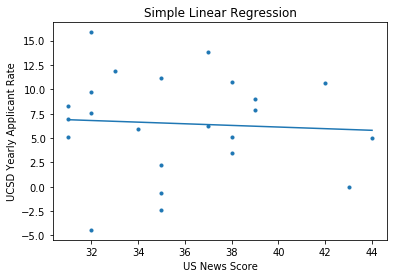

[[35.  73.2]
 [37.  73. ]
 [38.  75.2]
 [39.  67.4]
 [37.  68.6]
 [39.  72.2]
 [44.  73.2]
 [42.  78.7]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     3.416
Date:                Wed, 18 Dec 2019   Prob (F-statistic):              0.116
Time:                        22:13:02   Log-Likelihood:                -15.773
No. Observations:                   8   AIC:                             37.55
Df Residuals:                       5   BIC:                             37.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

/Users/amytrinhnguyen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [3]:
X = simple_linear_regress_data[:,0]
Y = simple_linear_regress_data[:,1]
results = sm.OLS(Y,sm.add_constant(X)).fit()
print(results.summary())
plt.scatter(X, Y, s=np.pi*3)
plt.title('Simple Linear Regression')
plt.xlabel('US News Score')
plt.ylabel('UCSD Yearly Applicant Rate')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

X = np.delete(multiple_linear_regress_data, [2], 1)
Y = multiple_linear_regress_data[:,2]
print(X)
results = sm.OLS(Y,sm.add_constant(X)).fit()
print(results.summary())

<h1> Sentiment Analysis </h1>

<h3> Data Sources</h3>
<p> The first data source is a News Article on UCSD which we web scraped. The second is the training data used to get the probabilities of sentiment given certain words.</p>

In [60]:
import pandas as pd

# training data from CMU's CSE class: http://boston.lti.cs.cmu.edu/classes/95-865-K/HW/HW3/
twitter_sent = pd.read_csv("twitter_sentiment.csv")

twitter_sent.head()

#Splice the words in each column to remove the short words and stem
def filter_col(text_col):
    spliced = text_col.split(" ")
    filtered = list(filter(remove_short, spliced))
    filtered_meaning = list(filter(remove_meaningless, filtered))
    filtered_duplicates = list(set(filtered_meaning))
    return filtered_duplicates

#remove words that are theoretically too short to mean much
def remove_short(word):
    if len(word) <= 3:
            return False
    return True


In [61]:
# import urllib.request
from bs4 import BeautifulSoup
import certifi
import requests
import re
# Web scraped an article for text (sentiment analysis)

# I consulted these articles:     
#       https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
#       https://www.geeksforgeeks.org/reading-selected-webpage-content-using-python-web-scraping/

# Consulted: https://incognitjoe.github.io/adding-certs-to-requests.html
try:
    print('Checking connection to Site...')
    site = requests.get("https://ucsdnews.ucsd.edu/"
                        + "pressrelease/stroke-drug-boosts-stem-cell"
                        + "-therapy-for-spinal-cord-injury-in-rats")
    print('Connection to Site OK.')
except requests.exceptions.SSLError as err:
    print('SSL Error. Adding custom certs to Certifi store...')
    cafile = certifi.where()
    with open('certicate.pem', 'rb') as infile:
        customca = infile.read()
    with open(cafile, 'ab') as outfile:
        outfile.write(customca)
    print('That might have worked.')

site = requests.get("https://ucsdnews.ucsd.edu/"
                        + "pressrelease/stroke-drug-boosts-stem-cell"
                        + "-therapy-for-spinal-cord-injury-in-rats")
soup=BeautifulSoup(site.content,'html.parser')
l=soup.findAll("p") # get all the paragraphs only in the html page

for i in l:
    strrr += str(i)

split_lst = list(re.findall(r"[a-zA-Z']+", strrr)) #keeps only alpha and splits string into a list
txt_lst = list(filter(remove_short, split_lst))
print(txt_lst)





Checking connection to Site...
Connection to Site OK.
['class', 'meta', 'post', 'meta', 'clearfix', 'span', 'class', 'updated', 'meta', 'date', 'class', 'calendar', 'November', 'span', 'span', 'class', 'vcard', 'author', 'meta', 'author', 'span', 'class', 'class', 'user', 'href', 'http', 'triton', 'news', 'author', 'author', 'title', 'Posts', 'Elew', 'Elew', 'span', 'span', 'span', 'class', 'meta', 'tags', 'class', 'href', 'http', 'triton', 'news', 'category', 'news', 'local', 'category', 'Local', 'href', 'http', 'triton', 'news', 'category', 'news', 'category', 'News', 'span', 'span', 'class', 'meta', 'comments', 'class', 'comment', 'span', 'class', 'postid', 'data', 'dsqidentifier', 'http', 'triton', 'news', 'span', 'span', 'Diego', 'Political', 'Science', 'Professor', 'Wong', 'plans', 'announce', 'campaign', 'Diego', 'Congressional', 'District', 'November', 'seat', 'which', 'opened', 'href', 'https', 'sandiegouniontribune', 'news', 'politics', 'story', 'susan', 'davis', 'retire', 'd

In [62]:
from nltk.stem import PorterStemmer #for stemming words

#get the stem for same meaning words
stemmer = PorterStemmer()
filtered_cols = twitter_sent['text'].apply(filter_col)
twitter_sent['text'] = filtered_cols.apply(lambda col: [stemmer.stem(word) for word in col])

swype
iphone
will
Iphone
that
will
adding
more
carrier
support
iPhone
Hilarious
video
does
duet
with
Pretty
much
sums
love
made
easy
switch
just
realized
that
reason
into
twitter
thanks
current
user
little
disappointed
with
Should
move
strangest
things
Siri
said
SOOO
glad
that
gave
Siri
sense
Great
close
personal
event
tonight
Regent
From
which
companies
experience
best
customer
service
aside
from
Just
apply
hope
they
call
Lmao
think
onto
something
Siri
suggested
where
find
whores
where
Lmao
think
onto
something
Siri
suggested
where
find
whores
where
hide
body
lolol
Just
registered
hoping
actually
help
greatly
Great
deals
refurbed
Apple
offers
great
deals
refurbished
iPads
Just
registered
hoping
actually
help
greatly
Currently
learning
Mandarin
upcoming
trip
Hong
gotta
hand
iPhones
their
uber
useful
flashcard
apps
Come
dark
side
send
free
iPhone
will
publicly
ceremoniously
burn
send
free
iPhone
version
will
will
publicly
ceremoniously
burn
Thank
Find
just
located
wiped
stolen
Thanks
Co

most
awful
interrupting
piece
crap
world
hate
Thats
dollars
down
iPhone
charging
very
very
slow
wash
better
solve
this
problem
give
Wish
could
pick
month
YEAR
when
setting
calendar
item
fixed
this
iTunes
worst
program
such
great
phone
make
some
awful
would
think
voice
recognition
tech
support
line
would
work
little
repair
iPad
Apple
lost
year
Android
here
Proper
consolidation
proper
syncing
stop
losing
PURCHASED
items
checkboxes
that
what
think
they
will
desktop
wack
though
made
reservation
still
have
wait
Apple
Store
Frustrated
that
bought
macbook
from
only
find
doesnt
ship
with
Dear
turn
those
awesome
featured
just
Data
plan
handle
data
just
because
better
than
there
problem
with
that
preventing
audio
apps
audio
functions
from
operating
keep
losing
thing
hater
about
this
finish
fast
stop
sending
your
dying
rapidly
Only
thing
about
camera
that
compact
flash
goes
Damn
pages
terms
conditions
when
update
apps
from
iTunes
really
think
read
fuck
prolly
ganna
late
work
screwed
phone
only
al

In [63]:
probs = {}
emo_count = {"Pos": 0, "Neg": 0}
row_count = twitter_sent.shape[0]
# iterate through all of the rows in the training data
for i in range(row_count):
    col = twitter_sent['class']
    col2 = twitter_sent['text']
    emo = str(col[i])
    txt = list(col2[i])
    
    # gets the count of the emotions for every single word in text
    for i in range(len(txt)):
        spliced = txt[i]
        # only use the words that appear in both the training dataset and the article
        if spliced not in art_words:
            continue
            
        word = probs.get(spliced)
        if word:
            if word.get(emo):
                word[emo] += 1
            else:
                word[emo] = 1
        else:
            probs[spliced] = {}
            word = probs.get(spliced)
            # nudge both counts over by 1 to prevent 
            # any of the counts from being 0 (only nudge each word once)
            word["Pos"] = 1
            word["Neg"] = 1
            word[emo] += 1
            emo_count['Pos'] += 1 # accounts for nudging
            emo_count['Neg'] += 1
        
        emo_count[emo] += 1
    

print(probs, emo_count)

{'that': {'Pos': 8, 'Neg': 32}, 'will': {'Pos': 9, 'Neg': 11}, 'support': {'Pos': 4, 'Neg': 3}, 'more': {'Pos': 4, 'Neg': 6}, 'with': {'Pos': 16, 'Neg': 48}, 'into': {'Pos': 2, 'Neg': 5}, 'said': {'Pos': 3, 'Neg': 3}, 'person': {'Pos': 2, 'Neg': 2}, 'from': {'Pos': 14, 'Neg': 16}, 'best': {'Pos': 5, 'Neg': 3}, 'which': {'Pos': 2, 'Neg': 4}, 'they': {'Pos': 3, 'Neg': 16}, 'help': {'Pos': 4, 'Neg': 2}, 'their': {'Pos': 3, 'Neg': 5}, 'send': {'Pos': 4, 'Neg': 10}, 'side': {'Pos': 3, 'Neg': 1}, 'break': {'Pos': 2, 'Neg': 3}, 'team': {'Pos': 2, 'Neg': 2}, 'some': {'Pos': 2, 'Neg': 8}, 'done': {'Pos': 6, 'Neg': 7}, 'when': {'Pos': 8, 'Neg': 14}, 'these': {'Pos': 2, 'Neg': 1}, 'want': {'Pos': 4, 'Neg': 8}, 'over': {'Pos': 5, 'Neg': 2}, 'about': {'Pos': 8, 'Neg': 16}, 'live': {'Pos': 2, 'Neg': 1}, 'than': {'Pos': 5, 'Neg': 8}, 'have': {'Pos': 8, 'Neg': 31}, 'work': {'Pos': 4, 'Neg': 16}, 'like': {'Pos': 5, 'Neg': 13}, 'time.': {'Pos': 2, 'Neg': 3}, 'most': {'Pos': 2, 'Neg': 6}, 'email': {'Pos'

In [64]:
def calc_cond(emo, word):
    if word.get(emo):
        return word.get(emo)/emo_count.get(emo)
    return 0

def calc_all_cond(emo):
    prob_words_given_emo = emo_count.get(emo)
    for key in probs.keys():
        word = probs.get(key)
        prob_words_given_emo *= calc_cond(emo, word)
    return prob_words_given_emo

In [65]:
prob_pos_g_w = calc_all_cond("Pos")
prob_neg_g_w = calc_all_cond("Neg")

if prob_pos_g_w > prob_neg_g_w:
    print("The article has positive sentiment")
elif prob_pos_g_w < prob_neg_g_w:
    print("The article has negative sentiment")
else:
    print("The article is neutral")

The article has positive sentiment


# Programming Experience

In this section, include information about your team's level of exprience programming in Python. Discuss briefly what new things (concepts, skills, packages, etc.) you learned by completing this extra credit.

<p>Three of the members have had Python programming experiance and are Data Science Majors (2 sophmores and 1 freshman). Some of us have taken DSC10 and DSC20 courses. However, we all needed refreshes as it was a while ago that some of us last wrote Python We also learned the new API: statsmodels. We didnt use this in our prior classes. We used this to perform simple and multiple linear regression. We also did lots of Google searches, this was useful to learn how to plot a scatter chart.</p>

<p>Amy's Past Experiences: I took DSC 20 and did a did a Data Challenge so I have basic experience using Python and Pandas.<br> Amy's contributions: I did the attempt for the sentiment analysis portion so I learned a lot about having reading data from a URL using URLlib and using beautiful soup to get rid of the unneccesary HTML. I applied the concepts of tokenization to stem words and remove unneccesary words for analysis. This is my first time using PorterStemmer. </p>

<p>Saroop worked on the data input, linear Regression and visualization and learned the statsmodels for the first time.</p>

<p>All members reviewed the code and had a basic understanding of what we were attempting.</p>



In [12]:
#https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error
import certifi

req = urllib.request.Request("https://ucsdnews.ucsd.edu/pressrelease/stroke-drug-boosts-stem-cell-therapy-for-spinal-cord-injury-in-rats")

# usock = urllib.request.urlopen(req)
# html = usock.read()
# usock.close()
# print(html)

with urllib.request.urlopen(req, cafile=certifi.where()) as response:
    the_page = response.read()
    soup=BeautifulSoup(the_page,'html.parser')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: cafile, cpath and cadefault are deprecated, use a custom context instead.
  # This is added back by InteractiveShellApp.init_path()


Checking connection to Site...
Connection to Site OK.
<p class="meta post-meta clearfix"><span class="updated meta-date"><i class="fa fa-calendar"></i>November 19, 2019</span><span class="vcard author meta-author"><span class="fn"><i class="fa fa-user"></i><a href="http://triton.news/author/mo/" rel="author" title="Posts by Mo Elew">Mo Elew</a></span></span><span class="meta-tags"><i class="fa fa-tag"></i><a href="http://triton.news/category/news/local/" rel="category tag">Local</a>, <a href="http://triton.news/category/news/" rel="category tag">News</a></span><span class="meta-comments"><i class="fa fa-comment-o"></i><span class="dsq-postid" data-dsqidentifier="28835 http://triton.news/?p=28835">0</span></span>
</p><p>UC San Diego Political Science Professor Tom Wong plans to announce his campaign for San Diego’s 53rd Congressional District on November 20, a seat which opened up <a href="https://www.sandiegouniontribune.com/news/politics/story/2019-09-04/rep-susan-davis-to-retire-drop

In [ ]:
strrr = ""
req = urllib.request.Request('http://triton.news/2019/11/ucsd-professor-tom-wong-to-announce-run-for-congress-tomorrow/')

with urllib.request.urlopen(req) as response:
    the_page = response.read()
    soup=BeautifulSoup(the_page,'html.parser')
    l=soup.findAll("p") # get all the paragraphs only in the html page
    
    for i in l:
        strrr += str(i)
    
    txt_lst = strrr.split(" ") #added all text to a list
    filt_txt_lst = list(filter(remove_short, txt_lst))
    art_words = list(filter(remove_meaningless, filt_txt_lst))
    print(art_words)